# "Concevez une application au service de la santé publique"
_Analysis Notebook_

In [2]:
from google.colab import files, drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [3]:
# May need to reboot the environment
!pip install -r "My Drive/--DATA SCIENCE/PROJET3/requirements.txt"
!pip install modin
!pip install modin[all]
!pip install ppscore

Ignoring colorama: markers 'sys_platform == "win32"' don't match your environment
Ignoring pywin32: markers 'sys_platform == "win32"' don't match your environment
Ignoring pywinpty: markers 'os_name == "nt"' don't match your environment
     |████████████████████████████████| 122kB 2.7MB/s 
     |████████████████████████████████| 122kB 8.3MB/s 
     |████████████████████████████████| 788kB 6.2MB/s 
     |████████████████████████████████| 61kB 6.8MB/s 
     |████████████████████████████████| 112kB 14.6MB/s 
     |████████████████████████████████| 9.7MB 9.1MB/s 
     |████████████████████████████████| 358kB 38.0MB/s 
     |████████████████████████████████| 921kB 41.0MB/s 
     |████████████████████████████████| 849kB 39.7MB/s 
     |████████████████████████████████| 512kB 41.7MB/s 
     |████████████████████████████████| 6.9MB 35.0MB/s 
     |████████████████████████████████| 92kB 9.4MB/s 
     |████████████████████████████████| 133kB 42.0MB/s 
  Created wheel for gtts-token: filename=gT

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import simplejson as json
import os
import missingno as msno
import ppscore as pps

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans

In [0]:
plt.rcParams['figure.facecolor']='w'

In [0]:
# get list of dtype from json
f = open('My Drive/--DATA SCIENCE/PROJET3/d_types.json', 'r')
d_types = json.loads(f.read())

In [0]:
# Import cleaned dataset
df = pd.read_csv('My Drive/--DATA SCIENCE/PROJET3/OFF_Cleaned.csv',
                 index_col='Unnamed: 0', dtype=d_types,
                 low_memory=False, encoding ='utf-8')

In [8]:
for i, c in enumerate(df.columns):
    print('\n'+c if i % 6 == 0 else c, end=' | ')


code | code_val | url | creator | created_datetime | main_category_en | 
main_category | categories_en | categories | pnns2 | pnns1 | labels_en | 
quantity_type | quantity_unit | quantity_num | serving_quantity | quantity | labels | 
generic_name | product_name | last_modified_datetime | brand_owner | brands | packaging | 
origins | manufacturing_places | emb_codes | first_packaging_code_geo | cities_tags | purchase_places | 
stores | countries | countries_en | ingredients_text | allergens | traces_tags | 
traces_en | serving_size | additives_n | additives_en | ingredients_from_palm_oil_n | nutriscore | 
nutrigrade | nova_group | ingredients_from_palm_oil_tags | ingredients_that_may_be_from_palm_oil_n | ingredients_that_may_be_from_palm_oil_tags | fat_100g | 
saturated-fat_100g | monounsaturated-fat_100g | polyunsaturated-fat_100g | omega-3-fat_100g | -alpha-linolenic-acid_100g | omega-6-fat_100g | 
trans-fat_100g | cholesterol_100g | carbohydrates_100g | sugars_100g | -lactose_100g |

In [0]:

# Defining groups of columns
info_cols =  ['code', 'code_val', 'url', 'creator', 'created_datetime',
              'quantity_type', 'quantity_unit', 'quantity_num', 
              'serving_quantity', 'quantity', 'generic_name', 'product_name', 
              'last_modified_datetime', 'brand_owner', 'brands', 'packaging', 
              'origins', 'manufacturing_places', 'emb_codes',
              'first_packaging_code_geo', 'cities_tags', 'purchase_places', 
               'stores', 'countries', 'countries_en', 'ingredients_text', ]

m_nutri_cols = ['fat_100g', 'carbohydrates_100g', 'proteins_100g',
                'sodium_100g']

fat_cols = ['saturated_fat_100g', 'monounsaturated_fat_100g',
            'polyunsaturated_fat_100g', 'omega_3_fat_100g',
            '_alpha_linolenic_acid_100g', 'omega_6_fat_100g', 
            'trans_fat_100g', 'cholesterol_100g' ]

carb_cols = ['_lactose_100g', 'starch_100g',  'sugars_100g', 'polyols_100g',
              'fiber_100g', '_soluble_fiber_100g', '_insoluble_fiber_100g' ] 

oli_vit_cols = ['vitamin_a_100g', 'vitamin_d_100g', 'vitamin_e_100g',
                'vitamin_k_100g', 'vitamin_c_100g', 'vitamin_b1_100g',
                'vitamin_b2_100g', 'vitamin_pp_100g', 'vitamin_b6_100g',
                'vitamin_b9_100g', 'folates_100g', 'vitamin_b12_100g',
                'biotin_100g', 'pantothenic_acid_100g', 'bicarbonate_100g',
                'potassium_100g', 'chloride_100g', 'calcium_100g',
                'phosphorus_100g', 'iron_100g', 'magnesium_100g', 'zinc_100g',
                'copper_100g', 'manganese_100g', 'selenium_100g', 'iodine_100g']

addit_cols = ['allergens', 'traces_tags', 'traces_en', 'serving_size',
              'additives_n', 'additives_en', 'ingredients_from_palm_oil_n',
              'ingredients_from_palm_oil_tags', 'labels', 'labels_en'
              'ingredients_that_may_be_from_palm_oil_n',
              'ingredients_that_may_be_from_palm_oil_tags']

scores_cols = ['nutriscore', 'nutrigrade', 'nova_group']

cat_cols = ['main_category_en', 'main_category', 'categories_en', 'categories',
            'pnns2', 'pnns1']

misc_cols = ['alcohol_100g',  'caffeine_100g', 'cocoa_100g', 'salt_100g']

rates_cols = ['fruits_vegetables_nuts_100g', 'carbon_footprint_100g',
              'fruits_vegetables_nuts_estimate_100g',
              'carbon_footprint_from_meat_or_fish_100g' ]

energy_cols = ['energy_from_fat_kj_100g', 'energy_kcal_100g', 'energy_kj_100g']

sel_cols = m_nutri_cols + scores_cols + ['energy_kj_100g', 'fiber_100g',
                           'sugars_100g', 'saturated_fat_100g']

In [0]:
df[['pnns1', 'pnns2']] = df[['pnns1', 'pnns2']].fillna('unknown')

# df['nutrigrade'] = df['nutrigrade'].map(dict(zip(list('abcde'), range(1,6))))

# df['countries'].astype('string')

In [23]:
df[cat_cols].isna().sum().sum()

0

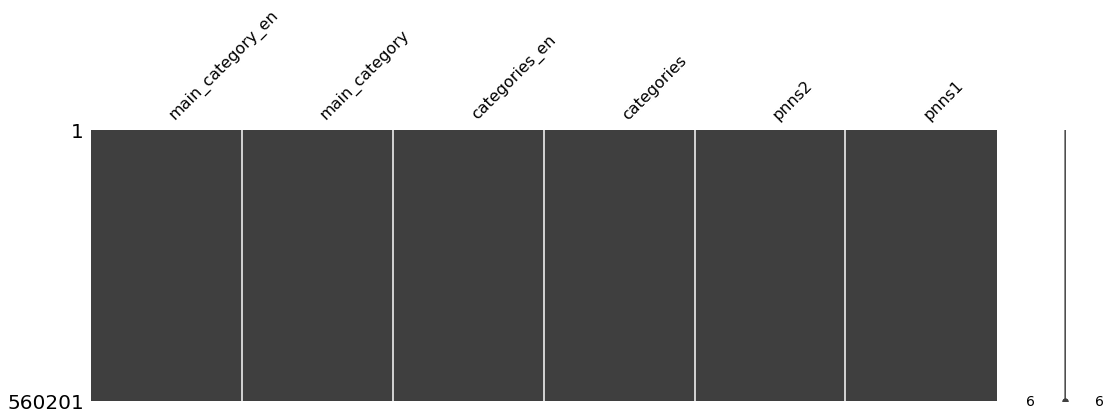

In [24]:
msno.matrix(df[cat_cols])
plt.gcf().set_size_inches(18,5)

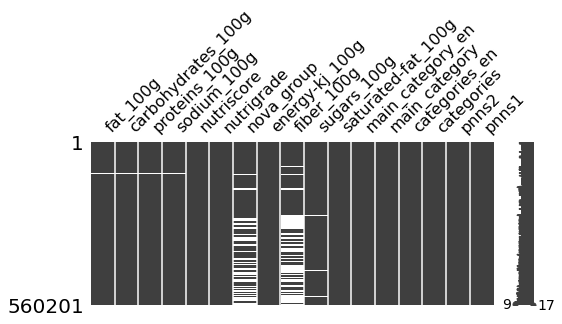

In [25]:
msno.matrix(df[sel_cols+cat_cols])
plt.gcf().set_size_inches(8,3)

## 1 Univariate analysis

### Histograms

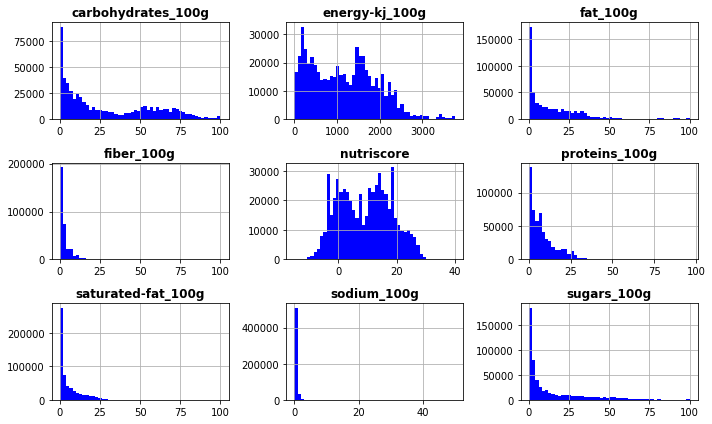

In [26]:
# Plotting histograms of the main quantitative continuous columns
hist_cols = m_nutri_cols+['nutriscore','energy_kj_100g', 'fiber_100g',
                        'sugars_100g', 'saturated_fat_100g']
fig = df[hist_cols].hist(figsize=(10,6), bins=50, color='b',
                        xlabelsize=10, ylabelsize=10);
[x.title.set_fontweight('bold') for x in fig.ravel()];
plt.tight_layout()
#plt.savefig( 'hist.png', format='png', bbox_inches = "tight", dpi=400)

('created_datetime', 'quantity_num', 'quantity_type', 'brands', 'countries')

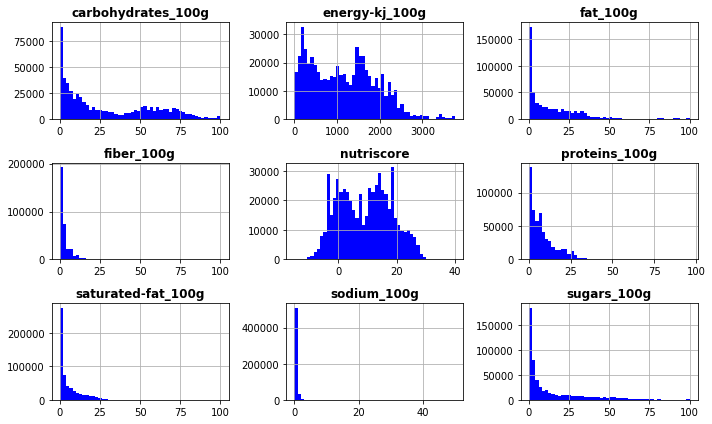

In [40]:
# Plotting histograms of the main quantitative continuous columns
num_cols = m_nutri_cols+['nutriscore','energy-kj_100g', 'fiber_100g',
                        'sugars_100g', 'saturated-fat_100g']
fig = df[num_cols].hist(figsize=(10,6), bins=50, color='b',
                        xlabelsize=10, ylabelsize=10);
[x.title.set_fontweight('bold') for x in fig.ravel()];
plt.tight_layout()
#plt.savefig( 'hist.png', format='png', bbox_inches = "tight", dpi=400)
'created_datetime', 'quantity_num', 'quantity_type', 'brands', 'countries'

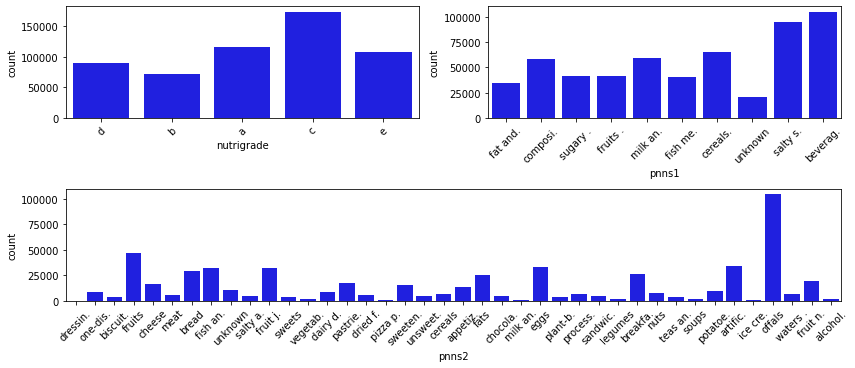

In [37]:
# Plotting histograms of the main quantitative continuous columns
bars_cols = ['nutrigrade','pnns1', 'pnns2']#, 'countries']
fig = plt.figure(figsize=(12,12))
for i, c in enumerate(bars_cols,1):
    if i>=3:
        ax = fig.add_subplot(5,1,i-1)
    else:
        ax = fig.add_subplot(5,2,i)
    sns.countplot(data=df, x=c, color='b',
                  order=sorted(df[c].unique()), ax=ax)
    t_labels = [s[0:7]+'.' if len(s)>7 else s for s in df[c].unique() ]
    ax.axes.set_xticklabels(t_labels)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Boxplots, swarmplots, violinplots, boxenplots

for nutrigrades subsets

In [0]:
nutri_pal = ['#008000', '#78D222', '#FFD700', '#FF8D00' , '#F23824']
# sns.set_palette(nutri_pal)

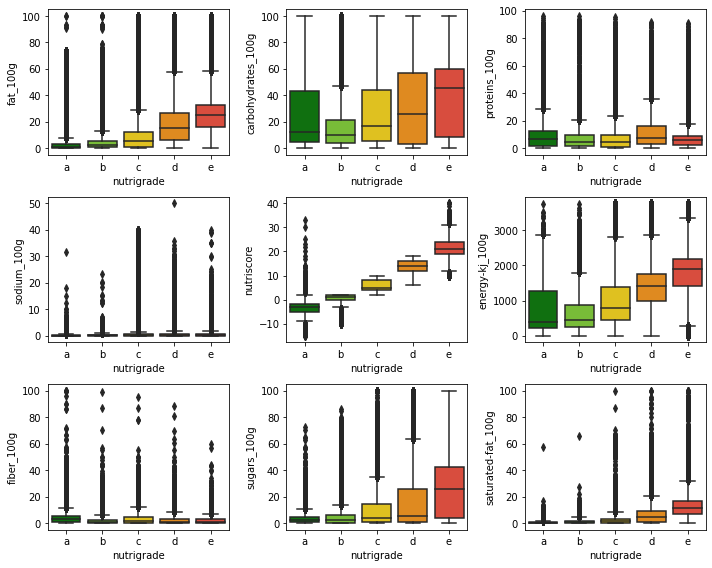

In [41]:
fig = plt.figure(figsize=(10,8))
with sns.color_palette(nutri_pal):
    for i, c in enumerate(num_cols,1):
        ax = fig.add_subplot(3,3,i) # (len(num_cols)+1)//3, 3
        sns.boxplot(data=df, x='nutrigrade', y=c, order=list('abcde'), ax=ax)
# fig.set_size_inches(12,10)
plt.tight_layout()

for categories subsets

## Bivariate analysis

Correlation in filled/missing values

### Correlation of variables

In [0]:
def plot_heatmap(corr, title, figsize=(8,4), vmin=-1, vmax=1, center=0,
                 palette = sns.color_palette("coolwarm", 20)):
    fig, ax = plt.subplots(figsize=figsize)
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    palette = palette
    ax = sns.heatmap(corr, mask=mask, cmap=palette, vmin=vmin, vmax=vmax,
                     center=center, annot=True, annot_kws={"size": 10}, fmt ='.2f',
                     square=False, linewidths=.5, linecolor = 'white',
                     cbar_kws={"shrink": .9, 'label': None},
                     xticklabels= corr.index, yticklabels = corr.columns)
    ax.tick_params(labelsize=10,top=False, bottom=True,
                labeltop=False, labelbottom=True)
    ax.collections[0].colorbar.ax.tick_params(labelsize=10)
    plt.setp(ax.get_xticklabels(), rotation=25, ha="right",rotation_mode="anchor")
    ax.set_title(title, fontweight='bold', fontsize=12)
    plt.show()

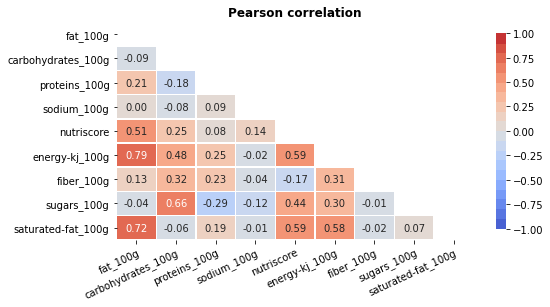

In [76]:
# Linear correlation (Pearson)
pears_corr = df[hist_cols].corr()
plot_heatmap(pears_corr, title="Pearson correlation", figsize=(8,4))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in 

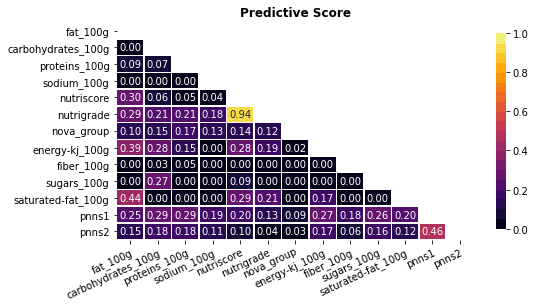

In [64]:
# Predictive Power Score (ppscore)
pps_corr = pps.matrix(df[sel_cols+['pnns1', 'pnns2']])
plot_heatmap(pps_corr, title="Predictive Score", 
             vmin=0, center=0.5, figsize=(8,4),
             palette=sns.color_palette("inferno", 20))

In [88]:
# Predictive Power Score (ppscore)
pps_corr2 = pps.matrix(df['fat_100g', 'car'])
plot_heatmap(pps_corr2, title="Predictive Score", 
             vmin=0, center=0.5, figsize=(8,4),
             palette=sns.color_palette("inferno", 20))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in 

NameError: ignored

Pair plots

CPU times: user 9.18 s, sys: 274 ms, total: 9.45 s
Wall time: 9.14 s


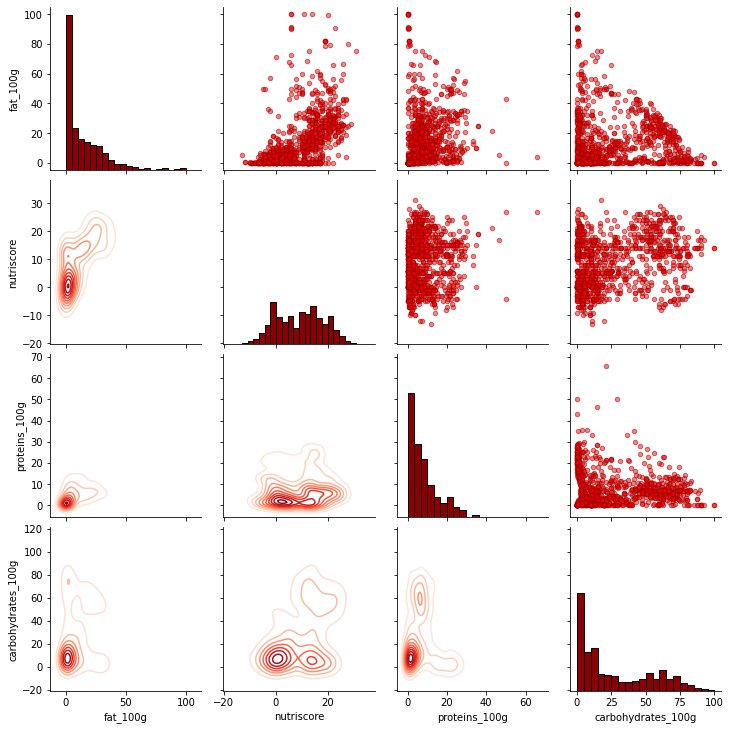

In [135]:
%%time
cols = ['fat_100g', 'nutriscore','proteins_100g','carbohydrates_100g']
# Scatterplot matrix (too much data -> on a sample)
df_sample = df.sample(1000)

# def testcorr(x, y, **kwargs):
#     coef = np.corrcoef(x, y)[0][1]
#     plt.gca().annotate(r'$\rho$ = fffffff' + str(round(coef, 2)),
#                        size = 15, xycoords = ax.transAxes, xy = (-0.1, -0.1)

grid = sns.PairGrid(data=df_test,
                    vars=cols, height=2.5)
grid = grid.map_upper(plt.scatter, marker='o', edgecolors='darkred',
                      alpha=0.5, color='red', s=20)
# grid = grid.map_upper(testcorr)
grid = grid.map_diag(plt.hist, bins = 20, color = 'darkred', edgecolor = 'k')
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')

#cols = ['fat_100g', 'nutriscore','proteins_100g','carbohydrates_100g']
# 1000 => CPU times: user 9.03 s, sys: 292 ms, total: 9.32 s Wall time: 9 s
# 10000 => CPU times: user 42.9 s, sys: 318 ms, total: 43.2 s Wall time: 42.9 s
# 100000 => CPU times: user 6min 40s, sys: 3.93 s, total: 6min 44s Wall time: 6min 44s

## Multivariable analysis

In [0]:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None, n_cols=3):
    n_rows = (n_comp+1)//n_cols
    fig = plt.figure(figsize=(16,n_rows*3))
    # boucle sur les plans factoriels (3 premiers plans -> 6 composantes)
    for i, (d1, d2) in enumerate(axis_ranks): 
        if d2 < n_comp:
            ax = fig.add_subplot(n_rows, n_cols, i+1)
            # limites
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])
            # flèches, si plus de 30, pas de pointes
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], angles='xy', scale_units='xy', scale=1, color="grey")
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, alpha=.1, color='black'))
            # noms de variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        ax.text(x, y, labels[i], fontsize='14', ha='center', va='center',
                                rotation=label_rotation, color="blue", alpha=0.5)
            # cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            ax.add_artist(circle)
            # définition des limites du graphique
            ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
            # affichage des lignes horizontales et verticales
            ax.plot([-1, 1], [0, 0], color='grey', ls='--')
            ax.plot([0, 0], [-1, 1], color='grey', ls='--')
            # nom des axes, avec le pourcentage d'inertie expliqué
            ax.set_xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            ax.set_ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))
            ax.set_title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
    plt.tight_layout()
    plt.show()

In [0]:
def display_factorial_planes(X_proj, n_comp, pca, axis_ranks, labels=None,
                             alpha=1, n_cols=3, illus_var=None, lab_on=True, size=10):
    n_rows = (n_comp+1)//n_cols
    fig = plt.figure(figsize=(16,n_rows*3))
    # boucle sur chaque plan factoriel
    for i, (d1,d2) in (enumerate(axis_ranks)):
        if d2 < n_comp:
            ax = fig.add_subplot(n_rows, n_cols, i+1)
            # points
            if illus_var is None:
                ax.scatter(X_proj[:, d1], X_proj[:, d2], alpha=alpha, s=size)
            else:
                illus_var = np.array(illus_var)
                for value in np.unique(illus_var):
                    sel = np.where(illus_var == value)
                    ax.scatter(X_proj[sel, d1], X_proj[sel, d2], 
                                alpha=alpha, label=value)
                ax.legend()
            # labels points
            if labels is not None and lab_on:
                for i,(x,y) in enumerate(X_proj[:,[d1,d2]]):
                    ax.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center')   
            # limites
            bound = np.max(np.abs(X_proj[:, [d1,d2]])) * 1.1
            ax.set(xlim=(-bound,bound), ylim=(-bound,bound))
            # lignes horizontales et verticales
            ax.plot([-100, 100], [0, 0], color='grey', ls='--')
            ax.plot([0, 0], [-100, 100], color='grey', ls='--')
            # nom des axes, avec le pourcentage d'inertie expliqué
            ax.set_xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            ax.set_ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))
            ax.set_title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
    plt.tight_layout()
    plt.show()

In [0]:
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show()

In [0]:
# Feature selection for PCA
id = df['code']
cols = ['fat_100g', 'nutriscore','proteins_100g','carbohydrates_100g']

# Imputation of missing values
print('-----missing values imputation-----')
display(df[cols].isna().sum())
X = df[cols].fillna(df.mean()).values

# Data standardisation
print('-----satandardisation----- \n')
X_sc = StandardScaler().fit_transform(X)
print(X[:3],np.array([[x.round(2) for x in li_x] for li_x in X_sc[:3]]), sep='\n')

# Principal components calculation
n = 6
pca = PCA(n_components=n).fit(X_sc) 

print("\n-----explained variance ratio-----\n")
print(pca.explained_variance_ratio_) # ratio d'inertie de chaque composante

print('\n-----coefficients of principal components (origianl features)-----\n')
print(pca.components_)
 
print('\n-----data projected in new space-----\n')
print(pca.transform(X_sc))

-----missing values imputation-----


fat_100g              5789
nutriscore               0
proteins_100g         5783
carbohydrates_100g    6079
dtype: int64

In [0]:
# Eboulis des valeurs propres
display_scree_plot(pca)

In [0]:
# Cercle des corrélations
display_circles(pca.components_, n, pca, [(0,1),(2,3),(4,5)], labels = np.array(var_names), n_cols=3)

In [0]:
# Projection des individus sur les plans d'origine
fig = plt.figure(figsize=(16,6))
for i, (d1,d2) in (enumerate([(0,1),(2,3),(4,5),(6,7)])):
    ax = fig.add_subplot (2, 3, i+1)
    ax.scatter(X_sc[:, d1], X_sc[:, d2], alpha=0.5, s=10)

In [0]:
# Projection des individus sur le plan factoriel
display_factorial_planes(pca.transform(X_sc), n, pca, [(0,1),(2,3),(4,5)],
                         labels = np.array(id_cours), n_cols=3, lab_on=False)

#### KMeans Clustering

In [0]:
df = pd.read_csv('./Dataset 1/my_courses.csv', index_col=0)
print(df.shape[0])
X = df.fillna(df.mean()).values
X_sc = StandardScaler().fit_transform(X)

In [0]:
n_clust = 6
km = KMeans(n_clusters=n_clust).fit(X_sc)

In [0]:
# Récupération des clusters attribués à chaque individu
clustK = km.labels_
df['cluster_Kmeans'] = clustK
clustK

In [0]:
# Projection des individus sur le plan factoriel
pca = PCA(n_components=4).fit(X_sc)
X_proj = pca.transform(X_sc)
display_factorial_planes(X_proj, 4, pca,
                         [(0,1),(2,3),(4,5)], labels=np.array(df.index),
                         illus_var = clust.astype(np.float), alpha=0.3, n_cols=3, lab_on=False, size=10)

In [0]:
# Affichage des clusters
for n, s_df in df.groupby('cluster_Kmeans'):
    display(s_df)

#### Hierarchical clustering

In [0]:
# Clustering hiérarchique
Z = linkage(X_sc, 'ward')
Z[0:15]

In [0]:
plt.figure(figsize=(16,10))
dendrogram(Z, labels = df.index, orientation = "right", count_sort='descending')
plt.show()

In [0]:
# Coupage du dendrogramme
n_clust = 6
clustH = fcluster(Z, n_clust, criterion='maxclust')
df['cluster_HierClust'] = clustH
clustH

In [0]:
# Affichage des clusters
for n, s_df in df.groupby('cluster_HierClust'):
    display(s_df)